In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack

In [ ]:
#### Vectors ####

a = [-27, -17, -15, -3, 11, -4, -1, 0, 0, -1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 'EOB']
b = [-27, 17, -15, -3, -11, -4, 1, 0, 0, -1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 'EOB']
c = [-27, -17, 15, -3, -11, -4, -1, 0, 0, 1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 'EOB']
d = [-27, 17, 15, -3, 11, -4, 1, 0, 0, 1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 'EOB']

In [ ]:
#### Matrix Quantization ####

Z = np.array([[16,11,10,16,24,40,51,61],
              [12,12,14,19,26,58,60,55],
              [14,13,16,24,40,57,69,56],
              [14,17,22,29,51,87,80,62],
              [18,22,37,56,68,109,103,77],
              [24,35,55,64,81,104,113,92],
              [49,64,78,87,103,121,120,101],
              [72,92,95,98,112,100,130,99]])

In [ ]:
#### Define Image Show Function ####
def show_image(img):
  plt.imshow(img, cmap='gray')
  plt.show()

In [ ]:
#### Define vector_to_matrix Function ####

def vector_to_matrix(n, seq, matrix):
  zero_seq = [0.0] * ((n*n) - (len(seq) - 1))
  seq.remove(seq[-1])
  complete_seq = seq + zero_seq
  sum_of_index = np.arange(n)
  for k in sum_of_index:
      for i in range(n):
          for j in range(n):
              sum = i + j
              if (sum == k):
                  matrix[i, j] = complete_seq[0]
                  complete_seq.remove(complete_seq[0])

  for i in range(n):
      for j in range(i ,n):
          sum = i + j
          if (sum % 2 == 0):
              swap = matrix[i, j]
              matrix[i,j] = matrix[j, i]
              matrix[j, i] = swap

  return matrix

In [ ]:
#### Define JPEG Decompression Function #####

def jpeg_decompress(T_hat, Z):
  T = T_hat * Z
  T_dot = fftpack.idctn(T, norm='ortho')
  T_dot = T_dot + 128

  return T_dot

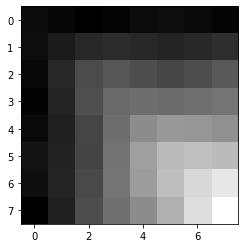

In [ ]:
#### Decompress Vector "a" ####
####  Show Decompressed Image  ####
matrix = np.zeros((8, 8))
T_hat1 = vector_to_matrix(8, a, matrix)
T_dot1 = jpeg_decompress(T_hat1, Z)
show_image(T_dot1)

In [ ]:
#### Decompress Vector "b", "c" And "d" ####

matrix = np.zeros((8, 8))
T_hat2 = vector_to_matrix(8, b, matrix)

matrix = np.zeros((8, 8))
T_hat3 = vector_to_matrix(8, c, matrix)

matrix = np.zeros((8, 8))
T_hat4 = vector_to_matrix(8, d, matrix)

T_dot2 = jpeg_decompress(T_hat2, Z)
T_dot3 = jpeg_decompress(T_hat3, Z)
T_dot4 = jpeg_decompress(T_hat4, Z)

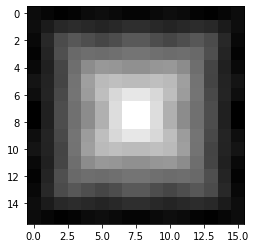

In [ ]:
#### Concatenate Decompressed Images ####
####     Show Concatenated Image     ####

ab = np.concatenate((T_dot1, T_dot2), axis=1)
cd = np.concatenate((T_dot3, T_dot4), axis=1)
abcd = np.concatenate((ab, cd), axis=0)
show_image(abcd)